<a href="https://colab.research.google.com/github/groupe11ML/groupe11ML/blob/main/KNN_tutoriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79, 99, 101]:
 print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  79, features: [5.7 2.6 3.5 1. ], label: 1
index:  99, features: [5.7 2.8 4.1 1.3], label: 1
index: 101, features: [5.8 2.7 5.1 1.9], label: 2


In [ ]:
np.random.seed(42)
indices = np.random.permutation(len(data))
n_training_samples = 12
learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]
print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
  print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")
  print("The first samples of our test set:")
  print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
  print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

The first samples of our learn set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
The first samples of our test set:
   1 [5.7 3.8 1.7 0.3]   0
The first samples of our test set:
   2 [7.7 2.6 6.9 2.3]   2
The first samples of our test set:
   3 [6.  2.9 4.5 1.5]   1
The first samples of our test set:
   4 [6.8 2.8 4.8 1.4]   1
The first samples of our test set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


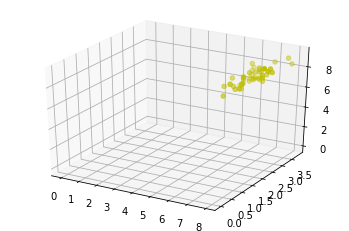

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
for i in range(len(learn_data)):
    if learn_labels[i] == iclass:
        X[iclass][0].append(learn_data[i][0])
        X[iclass][1].append(learn_data[i][1])
        X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [ ]:
def distance(instance1, instance2):
    """ Calculates the Eucledian distance between two instances"""
    print(distance([3, 5], [1, 1]))
    print(distance(learn_data[3], learn_data[44]))
    return np.linalg.norm(np.subtract(instance1, instance2))

In [ ]:
def get_neighbors(training_set,labels,test_instance, k,distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The function returns a list of k 3-tuples.
    Each 3-tuples consists of (index, dist, label)
    where
    index is the index from the training_set,
    dist is the distance between the test_instance and the
    instance training_set[index]
    distance is a reference to a function used to calculate the distances"""
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [1]:
for i in range(5):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],3,distance=distance)
    print("Index: ",i,'\n',"Testset Data: ",test_data[i],'\n',"Testset Label: ",test_labels[i],'\n',"Neighbors: ",neighbors,'\n')

NameError: ignored

In [ ]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
for neighbor in neighbors:
    class_counter [neighbor[2]] += 1
return class_counter.most_common(1)[0][0]

IndentationError: expected an indented block (<ipython-input-44-09e65fe2acf1>, line 5)

In [ ]:
def vote_prob(neighbors):
class_counter = Counter()
    for neighbor in neighbors:
class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],5,distance=distance)
    print("index: ", i,
    ", vote_prob: ", vote_prob(neighbors),
    ", label: ", test_labels[i],
    ", data: ", test_data[i])

IndentationError: expected an indented block (<ipython-input-91-9407024ec154>, line 2)

In [ ]:
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
number_of_neighbors = len(neighbors)
for index in range(number_of_neighbors):
    class_counter[neighbors[index][2]] += 1/(index+1)
labels, votes = zip(*class_counter.most_common())
#print(labels, votes)
winner = class_counter.most_common(1)[0][0]
votes4winner = class_counter.most_common(1)[0][1]
if all_results:
  total = sum(class_counter.values(), 0.0)
  for key in class_counter:
    class_counter[key] /= total
  return winner, class_counter.most_common()
else:
    return winner, votes4winner / sum(votes)
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distance)
print("index: ", i,", result of vote: ",vote_harmonic_weights(neighbors,all_results=True))

NameError: name 'neighbors' is not defined

In [ ]:
def vote_distance_weights(neighbors, all_results=True):
for index in range(number_of_neighbors):
  dist = neighbors[index][1]
  label = neighbors[index][2]
  winner = class_counter.most_common(1)[0][0
  votes4winner = class_counter.most_common(1)[0
if all_results:
  total = sum(class_counter.values(), 0.0)
for key in class_counter:
  class_counter[key] /= total
  return winner, class_counter.most_common()
else:
  return winner, votes4winner / sum(votes)
for i in range(n_training_samples):
  neighbors = get_neighbors(learn_data,
  learn_labels,
  test_data[i],6,distance=distance)
  print("index: ", i,
  ", result of vote: ",
  vote_distance_weights(neighbors,
  all_results=True

IndentationError: expected an indented block (<ipython-input-89-205a421c005e>, line 2)

In [ ]:
train_set = [(1, 2, 2),
(-3, -2, 0),
(1, 1, 3),
(-3, -3, -1),
(-3, -2, -0.5),
(0, 0.3, 0.8),
(-0.5, 0.6, 0.7),
(0, 0, 0) ]
labels = ['apple', 'banana', 'apple','banana', 'apple', "orange",'orange', 'orange'] 
k = 2
for test_instance in [(0, 0, 0), (2, 2, 2),
(-3, -1, 0), (0, 1, 0.9),
(1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
neighbors = get_neighbors(train_set,
labels,
test_instance, k,
distance=distance)
vote_distance_weights (neighbors))

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
from levenshtein import levenshtein
cities = open("data/city_names.txt").readlines()
cities = [city.strip() for city in cities]
for city in ["Freiburg", "Frieburg", "Freiborg",
"Hamborg", "Sahrluis"]:
    neighbors = get_neighbors(cities,cities,city, 2,distance=levenshtein)
print("vote_distance_weights: ", vote_distance_weights(neighbors))

ModuleNotFoundError: No module named 'levenshtein'

In [ ]:
words = []
for 
word = line.strip()
words.append(word)
K-NEAREST-NEIGHBOR CLASSIFIER 87
for word in ["holpful", "kundnoss", "holpposs", "thoes", "innersta
nd",
"blagrufoo", liberdi"]:
neighbors = get_neighbors(words,words,word, 3,distance=levenshtein)
print("vote_distance_weights: ", vote_distance_weights(neighbors,all_results=False))
print("vote_prob: ", vote_prob(neighbors))
print("vote_distance_weights: ", vote_distance_weights(neighbors))

IndentationError: expected an indented block (<ipython-input-88-f0dceea4698d>, line 3)